$\textbf{Nombre:}$ Pedro Ramos Suárez.

Utilizaremos las siguientes bibliotecas:

    · numpy: Para cálculos numéricos y arrays
    · sympy: Para obtener fórmulas y derivadas.
    · pandas: Para salidas en forma de tabla.
    · matplotlib.pyplot: Para representar gráficas.
    · IPython.display: Para imprimir ecuaciones por pantalla.
    · timeit.default_timer: Para poder medir el tiempo de ejecución.

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from timeit import default_timer

%matplotlib inline

# Opción para que imprima todas las columnas (aunque no entren en una tabla)
pd.set_option('display.max_rows', None)

# Aumentamos la precisión en las tablas
pd.set_option("display.precision", 12)

# Métodos de Euler

Primero, vamos a definir las funciones y las variables necesarias.

Definimos el intervalo $[a,b]$ y la condición inicial $y_{a}$:

In [2]:
a = 0
b = 1
ya = 1

Definimos las variables y la función:

In [3]:
x, y0, t = sp.symbols('x, y_0, t')

def f(t, x):
    return (t - x) / 2

Definimos la ecuación diferencial:

In [4]:
y = sp.Function('y')
edo = y(t).diff() - f(t, y(t))
display(sp.Eq(edo, 0))

Eq(-t/2 + y(t)/2 + Derivative(y(t), t), 0)

Y la resolvemos:

In [5]:
edo_sol = sp.dsolve(edo)
display(edo_sol)

Eq(y(t), (C1 + (t - 2)*exp(t/2))*exp(-t/2))

Imponemos las condiciones iniciales:

In [6]:
ics = {y(0): y0}
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))
display(CI_eq)

Eq(y_0, C1 - 2)

Resolvemos la ecuación con las soluciones iniciales:

In [7]:
CI_sol = sp.solve(CI_eq)
edo_sol.subs(CI_sol[0])

Eq(y(t), (y_0 + (t - 2)*exp(t/2) + 2)*exp(-t/2))

Y la solución exacta:

In [8]:
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})
display(sol_exacta)

((t - 2)*exp(t/2) + 3)*exp(-t/2)

Con todo esto, ya podemos definir el método de Euler:

In [9]:
def eulerExplicito(F, x0, y0, xfinal, N):
    ''' Método de Euler explícito para resolver el PVI
    RETURNS:
        X,Y     = integrate(F, x0, y0, xfinal, N)
    PARAMS:
        F       = función suplida por el usuario que devuelve 
                el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
        x0,y0   = condiciones iniciales 
        xfinal  = valor final de la variable x
        N       = número de nodos
    '''
    h = (xfinal - x0) / N
    if N > 1:
        X = np.linspace(x0, xfinal, N+1)
        Y = [y0];

        for n in range(N):
            Y.append(Y[n] + h * F(X[n], Y[n]))

        return np.array(X), np.array(Y)
    else:
        return np.array([x0, xfinal]), np.array([y0, y0 + h*F(x0,y0)])
    
def eulerImplicito(F, x0, y0, xfinal, N):
    ''' Método de Euler implícito para resolver el PVI
    RETURNS:
        X,Y     = integrate(F, x0, y0, xfinal, N)
    PARAMS:
        F       = función suplida por el usuario que devuelve 
                el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
        x0,y0   = condiciones iniciales 
        xfinal  = valor final de la variable x
        N       = número de nodos
    '''
    h = (xfinal - x0) / N
    if N > 1:
        X = np.linspace(x0, xfinal, N+1)
        Y = [y0];
        y1 = sp.Symbol('y1')

        for n in range(N):
            Y.append(sp.solve(Y[n] + h * F(X[n+1], y1) - y1, y1)[0])
        return np.array(X), np.array(Y)
    else:
        return np.array([x0, xfinal]), np.array([y0, y0 + h*F(x0,y0)])

Comprobámos que funciona correctamente:

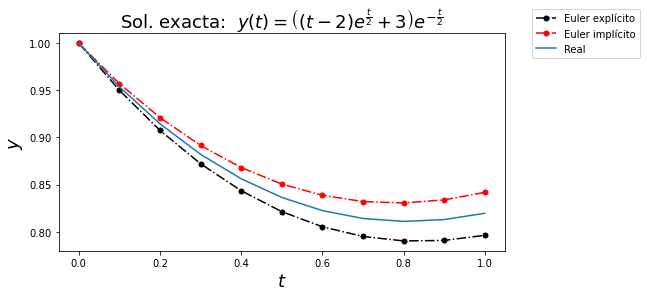

Error en Euler Explícito: 0.0233811614227636. 
Error en Euler Implícito: 0.0221477814843788.


In [10]:
nodos = 10

# Valores obtenidos por los métodos de Euler
xxExplicito, yyExplicito = eulerExplicito(f, a, ya, b, nodos)
xxImplicito, yyImplicito = eulerImplicito(f, a, ya, b, nodos)

# Valores reales
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])

# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxExplicito, yyExplicito, 'k-.o', label='Euler explícito', markersize=5) # Solución obtenida con el método de Euler explícito
ax.plot(xxImplicito, yyImplicito, 'r-.o', label='Euler implícito', markersize=5) # Solución obtenida con el método de Euler implícito
ax.plot(xx, yy, label='Real') # Solución real

ax.legend(bbox_to_anchor=(1.05, 1), loc='center left')
plt.show()

# Errores

errorExplicito = abs(yy - yyExplicito).max()
errorImplicito = abs(yy - yyImplicito).max()
print('Error en Euler Explícito: {}. \nError en Euler Implícito: {}.'.format(errorExplicito, errorImplicito))

#### Ejercicio 1: Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional .

In [11]:
def ejercicio1Explicito(nodosMin, nodosMax, nodosIt):
    fig, ax = plt.subplots(figsize = (8, 4))
    
    iteraciones = int((nodosMax - nodosMin) / nodosIt) + 1
    tiempo = np.zeros(iteraciones)
    error = np.zeros(iteraciones)
    columns = []

    for i in range(nodosMin, nodosMax+1, nodosIt):
        start = default_timer()
        xx, yy = eulerExplicito(f, a, ya, b, i)
        elapsed = default_timer() - start
        
        ax.plot(xx, yy, '-.o', label='Nodos: {}'.format(i))
        ax.set_title(r"Euler explícito")
        ax.set_xlabel(r"$t$", fontsize=18)
        ax.set_ylabel(r"$y$", fontsize=18)
        
        iteracion = int((i - nodosMin) / nodosIt)
        tiempo[iteracion] = elapsed * 1000
        columns.append('{} nodo(s)'.format(i))
                
        yyReal = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
        error[iteracion] = abs(yy - yyReal).max()

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    data = np.vstack([error, tiempo])
    data = pd.DataFrame(data, columns=columns, index=['Error', 'Tiempo'])
    display(data)
    
def ejercicio1Implicito(nodosMin, nodosMax, nodosIt):
    fig, ax = plt.subplots(figsize = (8, 4))
    
    iteraciones = int((nodosMax - nodosMin) / nodosIt) + 1
    tiempo = np.zeros(iteraciones)
    error = np.zeros(iteraciones)
    columns = []

    for i in range(nodosMin, nodosMax+1, nodosIt):
        start = default_timer()
        xx, yy = eulerImplicito(f, a, ya, b, i)
        elapsed = default_timer() - start
        
        ax.plot(xx, yy, '-.o', label='Nodos: {}'.format(i))
        ax.set_title(r"Euler implícito")
        ax.set_xlabel(r"$t$", fontsize=18)
        ax.set_ylabel(r"$y$", fontsize=18)
        
        iteracion = int((i - nodosMin) / nodosIt)
        tiempo[iteracion] = elapsed * 1000
        columns.append('{} nodo(s)'.format(i))
                
        yyReal = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
        error[iteracion] = abs(yy - yyReal).max()

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    data = np.vstack([error, tiempo])
    data = pd.DataFrame(data, columns=columns, index=['Error', 'Tiempo (ms)'])
    display(data)
    plt.show()

Euler Explícito:



,1 nodo(s),5 nodo(s),9 nodo(s),13 nodo(s),17 nodo(s),21 nodo(s),25 nodo(s),29 nodo(s),33 nodo(s),37 nodo(s),41 nodo(s),45 nodo(s),49 nodo(s)
Error,0.319591979138,0.048121979138,0.026060509899,0.017869720734,0.01359656614,0.010972735199,0.009197789801,0.007917127127,0.006949509942,0.00619265667,0.005584467873,0.005085058474,0.004667639903
Tiempo,0.010636000000,0.312050000000,0.107226000000,0.198763000000,0.18492900000,0.237245000000,0.169458000000,0.148534000000,0.296659000000,0.12200500000,0.123926000001,0.122870000000,0.132136000000


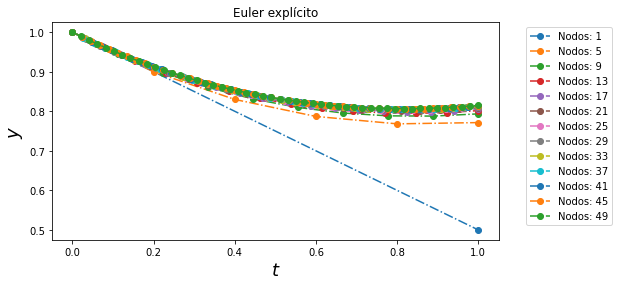

In [12]:
print('Euler Explícito:\n')
ejercicio1Explicito(1, 50, 4)

Euler Implícito:



,1 nodo(s),3 nodo(s),5 nodo(s),7 nodo(s),9 nodo(s),11 nodo(s),13 nodo(s),15 nodo(s),17 nodo(s),19 nodo(s),21 nodo(s),23 nodo(s),25 nodo(s)
Error,0.319591979138,0.06962084885,0.04317199004,0.031289846925,0.024537422757,0.020182319639,0.017140240056,0.014895145487,0.01317010001,0.011803159078,0.010693296543,0.009774221813,0.009000632447
Tiempo (ms),0.012681999999,27.74373400000,104.61457700000,125.343145000000,199.628133000000,211.228150999999,247.877938000000,294.949753000000,348.68320900000,380.235055000000,433.163077000001,459.738224000001,515.548598000001


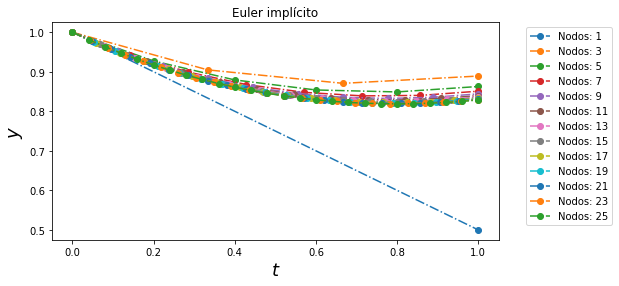

In [13]:
print('Euler Implícito:\n')
ejercicio1Implicito(1, 25, 2)

Claramente podemos ver en ambos casos como al aumentar el número de nodos aumenta el tiempo de ejecución pero disminuye el error.

Es recomendable, en caso de que se quiera ver visualmente en lugar de númericamente, disminuir el número de nodos para que las gráficas sean distinguibles.

Utilizo default_timer en lugar de %timeit como en el guión de prácticas para obtener una mayor precisión, aunque siendo tiempos tan pequeños es posible que no sea del todo correcta.

#### Ejercicio 2: A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

In [14]:
def eulerPuntoMedio(F, x0, y0, xfinal, N):
    ''' Método de Euler mejorado o del punto medio para resolver el PVI
    RETURNS:
        X,Y     = integrate(F, x0, y0, xfinal, N)
    PARAMS:
        F       = función suplida por el usuario que devuelve 
                el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
        x0,y0   = condiciones iniciales 
        xfinal  = valor final de la variable x
        N       = número de nodos
    '''
    h = (xfinal - x0) / N
    X = np.linspace(x0, xfinal, N+1)
    Y = [y0];

    for n in range(N):
        Y.append(Y[n] + h * F(X[n] + h / 2, Y[n] + h / 2 * F(X[n], Y[n])))

    return np.array(X), np.array(Y)

def eulerHeun(F, x0, y0, xfinal, N):
    ''' Método de Euler modificado o de Heun para resolver el PVI
    RETURNS:
        X,Y     = integrate(F, x0, y0, xfinal, N)
    PARAMS:
        F       = función suplida por el usuario que devuelve 
                el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
        x0,y0   = condiciones iniciales 
        xfinal  = valor final de la variable x
        N       = número de nodos
    '''
    h = (xfinal - x0) / N
    X = np.linspace(x0, xfinal, N+1)
    Y = [y0];
    y1 = sp.Symbol('y1')

    for n in range(N):
        Y.append(Y[n] + h / 2 * ( F(X[n], Y[n]) + F(X[n+1], Y[n] + h * F(X[n], Y[n]))))
    return np.array(X), np.array(Y)

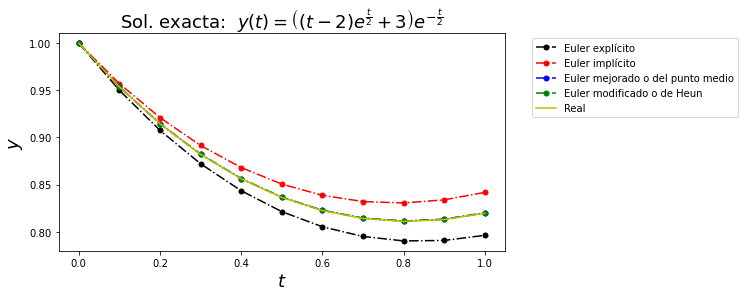

Error de Euler Mejorado o del punto medio: 0.000393623839967439 
Error de Euler modificado o de Heun: 0.000393623839967328.


In [15]:
# Usamos los valores de nodos, euler implicito y explicito calculados antes del ejercicio 1
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxPuntoMedio, yyPuntoMedio = eulerPuntoMedio(f, a, ya, b, nodos)
xxHeun, yyHeun = eulerHeun(f, a, ya, b, nodos)

# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxExplicito, yyExplicito, 'k-.o', label='Euler explícito', markersize=5) # Solución obtenida con el método de Euler explícito
ax.plot(xxImplicito, yyImplicito, 'r-.o', label='Euler implícito', markersize=5) # Solución obtenida con el método de Euler implícito
ax.plot(xxPuntoMedio, yyPuntoMedio, 'b-.o', label='Euler mejorado o del punto medio', markersize=5) # Solución obtenida con el método de Euler implícito
ax.plot(xxHeun, yyHeun, 'g-.o', label='Euler modificado o de Heun', markersize=5) # Solución obtenida con el método de Euler implícito
ax.plot(xx, yy, 'y', label='Real') # Solución real

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorPuntoMedio = abs(yy - yyPuntoMedio).max()
errorHeun = abs(yy - yyHeun).max()
print('Error de Euler Mejorado o del punto medio: {} \nError de Euler modificado o de Heun: {}.'.format(errorPuntoMedio, errorHeun))

Los errores de Euler explícito y Euler implícito eran de 0.2 aproximadamente, mientras que los obtenidos con Euler mejorado y Euler modificado son mucho más pequeños, por lo que es casi imposible distinguirlos de la gráfica real.

# Métodos de Taylor

Utilizamos el método de los apuntes de las prácticas:

In [16]:
def taylor2(F, x0, y0, xfinal, N):
    ''' Método del método de Taylor de orden 2 para resolver el PVI
        X,Y     = integrate(F,x0,y0,xfinal,N).
        {y}'    = {F(x,{y})}, donde
        {y}     = {y[0],y[1],...y[N-1]}.
        x0,y0   = condiciones iniciales 
        xfinal  = valor final de la variable x
        h       = incremento de x usado para la integración
        F       = función suplida por el usuario que devuelve 
                el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    '''
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z) * F1(t,z)
    
    for n in range(N):
        Y.append(Y[n] + h * F1(X[n], Y[n]) + h**2 / 2 * F2(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X), np.array(Y)

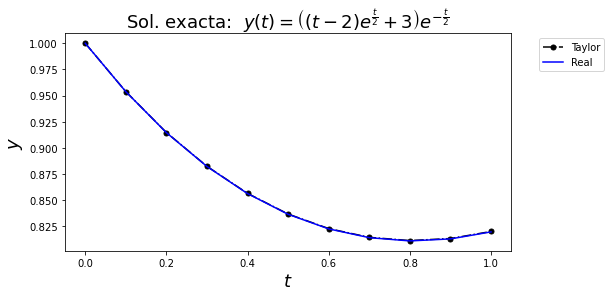

Error de Taylor de orden 2: 0.000393623839967439.


In [17]:
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxTaylor, yyTaylor = taylor2(f, a, ya, b, nodos)


# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxTaylor, yyTaylor, 'k-.o', label='Taylor', markersize=5)
ax.plot(xx, yy, 'b', label='Real')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorTaylor = abs(yy - yyTaylor).max()
print('Error de Taylor de orden 2: {}.'.format(errorTaylor))


#### Ejercicio 1: Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.

In [18]:
def ejercicio1Taylor(nodosMin, nodosMax, nodosIt):
    fig, ax = plt.subplots(figsize = (8, 4))
    
    iteraciones = int((nodosMax - nodosMin) / nodosIt) + 1
    tiempo = np.zeros(iteraciones)
    error = np.zeros(iteraciones)
    orden = np.zeros(iteraciones - 1)
    columns = []

    for i in range(nodosMin, nodosMax+1, nodosIt):
        start = default_timer()
        xx, yy = taylor2(f, a, ya, b, i)
        elapsed = default_timer() - start
        
        ax.plot(xx, yy, '-.o', label='Nodos: {}'.format(i))
        ax.set_title(r"Tylor de orden 2")
        ax.set_xlabel(r"$t$", fontsize=18)
        ax.set_ylabel(r"$y$", fontsize=18)
        
        iteracion = int((i - nodosMin) / nodosIt)
        tiempo[iteracion] = elapsed * 1000
        columns.append('{} nodo(s)'.format(i))
                
        yyReal = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
        error[iteracion] = abs(yy - yyReal).max()

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    data = np.vstack([error, tiempo])
    data = pd.DataFrame(data, columns=columns, index=['Error', 'Tiempo'])
    display(data)

,1 nodo(s),3 nodo(s),5 nodo(s),7 nodo(s),9 nodo(s),11 nodo(s),13 nodo(s),15 nodo(s),17 nodo(s),19 nodo(s),21 nodo(s),23 nodo(s),25 nodo(s)
Error,0.055408020862,0.004779484339,0.001635316809,0.000816445787,0.000488000399,0.000324193909,0.000230893257,0.000172757095,0.000134102555,0.000107106275,0.000087511273,0.000072840036,0.000061571181
Tiempo,1.066185999999,5.577086000001,8.052617999999,25.845660000000,28.296278999999,36.160048999999,28.898117000001,21.400819999998,26.136578999999,28.592573999999,32.562889999999,35.130423000000,38.162533000001


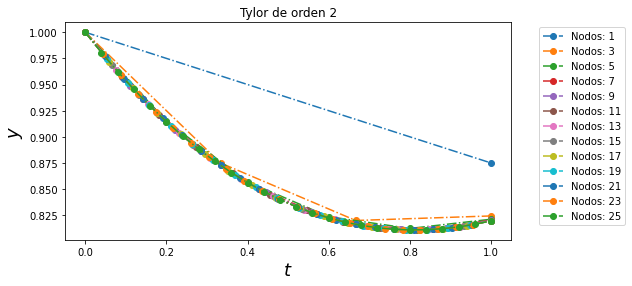

In [19]:
ejercicio1Taylor(1, 25, 2)

#### Ejercicio 2: A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.

Como estamos en el caso $p = 3$, tenemos que calcular:
$$y(t+h)\approx y(t) + hy'(t) + \frac{h^2}{2}y''(t) + \frac{h^{3}}{6}y'''(t)$$

Por lo que nos queda calcular $y'''(t)$ (para simplificar, usaré $y$ en lugar de $y(t)$):
$$y''(t) = \frac{d}{dt} y''(t, y) = y''(t) \frac{d}{dy} f(t, y) + y'(t)^{2} \frac{d^{2}}{d^{2}y} f(t, y) + 2 y'(t) \frac{d^{2}}{dfdt} f(t, y) + \frac{d^{2}}{d^{2}t}f(t, y) =$$
$$= F_{2}(t, y) \frac{d}{dy} f(t, y) + f(t, y)^{2} \frac{d^{2}}{d^{2}y} f(t, y) + 2 f(t, y) \frac{d^{2}}{dfdt} f(t, y) + \frac{d^{2}}{d^{2}t}f(t, y) \equiv F_{3}(t, y(t))$$

Y entonces nos queda:
$$y(t+h)\approx y(t) + hF_{1}(t, y(t)) + \frac{h^2}{2}F_{2}(t, y(t)) + \frac{h^{3}}{6}F_{3}(t, y(t))$$

In [20]:
def taylor3(F, x0, y0, xfinal, N):
    ''' Método del método de Taylor de orden 2 para resolver el PVI
        X,Y     = integrate(F,x0,y0,xfinal,N).
        {y}'    = {F(x,{y})}, donde
        {y}     = {y[0],y[1],...y[N-1]}.
        x0,y0   = condiciones iniciales 
        xfinal  = valor final de la variable x
        h       = incremento de x usado para la integración
        F       = función suplida por el usuario que devuelve 
                el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    '''
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0, xfinal, N + 1)
    Y = [y0]; h = (xfinal - x0) / N
    
    def F1(t, z):
        return F(t,z)

    def F2(t, z):
        return sp.diff(F(t, z), t) + sp.diff(F(t, z), z) * F1(t, z)
    
    def F3(t, z):
        return F2(t, z) * sp.diff(F(t, z), z) + F(t, z)**2 + sp.diff(sp.diff(F(t, z), z), z) + 2 * F(t, z) * sp.diff(sp.diff(F(t, z), z), t) + sp.diff(sp.diff(F(t, z), t), t)
    
    for n in range(N):
        Y.append(Y[n] + h * F1(X[n], Y[n]) + h**2 / 2 * F2(t, z).subs({t:X[n], z:Y[n]}) + h**3 / 6 * F3(t, z).subs({t:X[n],z:Y[n]}))
    return np.array(X), np.array(Y)

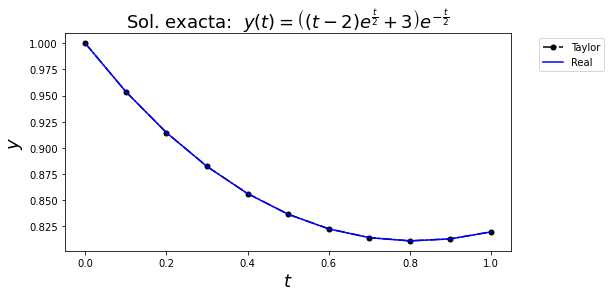

Error de Taylor de orden 3: 0.0000984471695920641.


In [21]:
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxTaylor, yyTaylor = taylor3(f, a, ya, b, nodos)


# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxTaylor, yyTaylor, 'k-.o', label='Taylor', markersize=5)
ax.plot(xx, yy, 'b', label='Real')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorTaylor = abs(yy - yyTaylor).max()
print('Error de Taylor de orden 3: {}.'.format(errorTaylor))

# Métodos de Runge-Kutta

Utilizamos el método de los apuntes de las prácticas:

In [22]:
def rungeKutta4(F, x0, y0, xfinal, N):
    ''' Método de Runge-Kutta de cuarto orden para resolver
        el problema de valores iniciales {y}' = {F(x,{y})}, 
        donde    {y} = {y[0],y[1],...y[N-1]}.
        X,Y    = integrate(F,x0,y0,xfinal,h).
        x0,y0  = condiciones iniciales
        xfinal = valor final de x
        N      = número de subintervalos de la partición
        h      = incremento de x usado en la integración
        F      = función suplida por el usuario que devuelve el
                array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    '''

    def RK4(F, xn, yn, h):
        K1 = F(xn, yn)
        K2 = F(xn + h / 2, yn + K1 * h / 2)
        K3 = F(xn + h / 2, yn + K2 * h / 2)
        K4 = F(xn + h  , yn + K3 * h)
        return (K1 + 2 * K2 + 2 * K3 + K4)/6    
    
    X = np.linspace(x0, xfinal, N + 1)
    Y = [y0];
    h = (xfinal - x0) / N
    for n in range(N):
        Y.append( Y[n] + h * RK4(F, X[n], Y[n], h) )
    return np.array(X), np.array(Y)

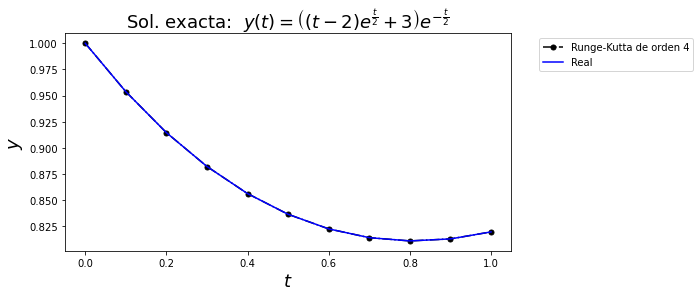

Error de Runge-Kutta de orden 4: 4.94025241826179E-8.


In [23]:
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxRK, yyRK = rungeKutta4(f, a, ya, b, nodos)


# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxRK, yyRK, 'k-.o', label='Runge-Kutta de orden 4', markersize=5)
ax.plot(xx, yy, 'b', label='Real')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorRK = abs(yy - yyRK).max()
print('Error de Runge-Kutta de orden 4: {}.'.format(errorRK))

#### Ejercicio 1: Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional .

In [24]:
def ejercicio1RK(nodosMin, nodosMax, nodosIt):
    fig, ax = plt.subplots(figsize = (8, 4))
    
    iteraciones = int((nodosMax - nodosMin) / nodosIt) + 1
    tiempo = np.zeros(iteraciones)
    error = np.zeros(iteraciones)
    orden = np.zeros(iteraciones - 1)
    columns = []

    for i in range(nodosMin, nodosMax+1, nodosIt):
        start = default_timer()
        xx, yy = rungeKutta4(f, a, ya, b, i)
        elapsed = default_timer() - start
        
        ax.plot(xx, yy, '-.o', label='Nodos: {}'.format(i))
        ax.set_title(r"Runge-Kutta de orden 4")
        ax.set_xlabel(r"$t$", fontsize=18)
        ax.set_ylabel(r"$y$", fontsize=18)
        
        iteracion = int((i - nodosMin) / nodosIt)
        tiempo[iteracion] = elapsed * 1000
        columns.append('{} nodo(s)'.format(i))
                
        yyReal = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
        error[iteracion] = abs(yy - yyReal).max()

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    data = np.vstack([error, tiempo])
    data = pd.DataFrame(data, columns=columns, index=['Error', 'Tiempo'])
    display(data)

,1 nodo(s),3 nodo(s),5 nodo(s),7 nodo(s),9 nodo(s),11 nodo(s),13 nodo(s),15 nodo(s),17 nodo(s),19 nodo(s),21 nodo(s),23 nodo(s),25 nodo(s)
Error,0.000720520862,0.000006723502,0.000000824132,0.000000209471,0.000000075647,0.000000033615,0.000000017132,0.000000009624,0.000000005814,0.000000003717,0.000000002485,0.000000001724,0.000000001233
Tiempo,0.111129999999,0.119509999999,0.139065000001,0.150665000000,0.168579000000,0.437722000001,0.216043000000,0.258866000001,0.338422000000,0.238475000002,0.215316000000,0.202008000000,0.208904000001


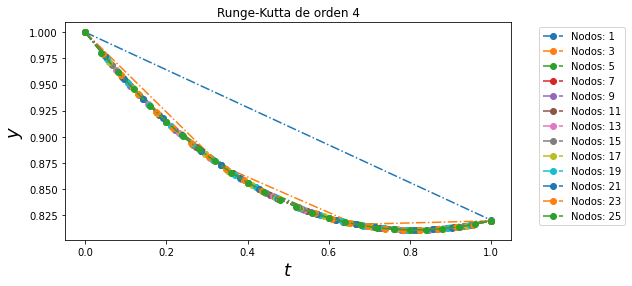

In [25]:
ejercicio1RK(1, 25, 2)

Como cabe esperar, al aumentar el número de nodos disminuimos el error pero aumentamos el tiempo de ejecución.

#### Ejercicio 2: A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher.

De en.wikipedia.org/wiki/Runge-Kutta_methods#Explicit_Runge.E2.80.93Kutta_methods, obtenemos el siguiente método de orden 5:

In [26]:
def rungeKutta5(F, x0, y0, xfinal, N):
    ''' Método de Runge-Kutta de cuarto orden para resolver
        el problema de valores iniciales {y}' = {F(x,{y})}, 
        donde    {y} = {y[0],y[1],...y[N-1]}.
        X,Y    = integrate(F,x0,y0,xfinal,h).
        x0,y0  = condiciones iniciales
        xfinal = valor final de x
        N      = número de subintervalos de la partición
        h      = incremento de x usado en la integración
        F      = función suplida por el usuario que devuelve el
                array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    '''

    def RK5(F, xn, yn, h):
        K1 = F(xn, yn)
        K2 = F(xn + h / 4      , yn + K1 * h / 4)
        K3 = F(xn + h * 3 / 8  , yn + K1 * h * 3 / 32 +      K2 * h * 9 / 32)
        K4 = F(xn + h * 12 / 13, yn + K1 * h * 1932 / 2197 + K2 * h * -7200 / 2197 + K3 * h * 7296 / 2197)
        K5 = F(xn + h          , yn + K1 * h * 439 / 216 +   K2 * h * -8 +           K3 * h * 3680 / 513 +   K4 * h * -845 / 4104)
        K6 = F(xn + h / 2      , yn + K1 * h * -8/27 +       K2 * h * 2 +            K3 * h * -3544 / 2565 + K4 * h * 1859 / 4104 + K5 * h * -11/40)
        return 16 / 135 * K1 + 6656 / 12825 * K3 + 28561 / 56430 * K4 - 9 / 50 * K5 + 2 / 55 * K6    
    
    X = np.linspace(x0, xfinal, N + 1)
    Y = [y0];
    h = (xfinal - x0) / N
    for n in range(N):
        Y.append( Y[n] + h * RK5(F, X[n], Y[n], h) )
    return np.array(X), np.array(Y)

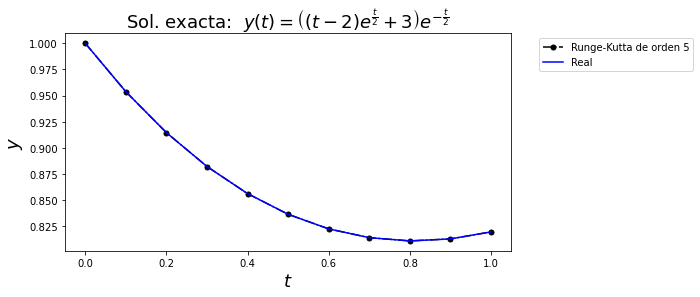

Error de Runge-Kutta de orden 5: 2.68479571907676E-10.


In [27]:
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxRK, yyRK = rungeKutta5(f, a, ya, b, nodos)


# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxRK, yyRK, 'k-.o', label='Runge-Kutta de orden 5', markersize=5)
ax.plot(xx, yy, 'b', label='Real')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorRK = abs(yy - yyRK).max()
print('Error de Runge-Kutta de orden 5: {}.'.format(errorRK))

# Métodos de tipo Adams

Tomamos la fórmula de los apuntes:

In [28]:
def adams2(F,x0,y0,xfinal,N):
    def AB2(F,x0,y0,y1,h):
        return (3*F(x0+h,y1)-F(x0,y0))/2    
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0);
    Y = [y0,y1]
    for n in range(N-1):
        Y.append(Y[n+1] + h*AB2(F,X[n],Y[n],Y[n+1],h))
    return np.array(X),np.array(Y)

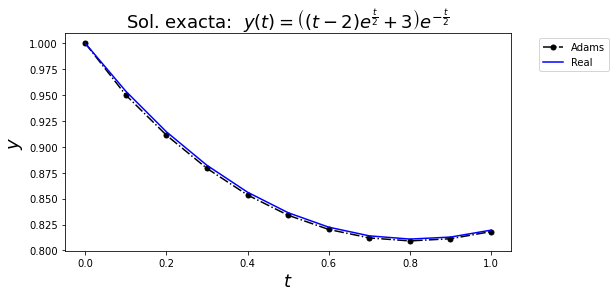

Error de Adams: 0.00368827350214207.


In [29]:
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxAdams, yyAdams = adams2(f, a, ya, b, nodos)


# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxAdams, yyAdams, 'k-.o', label='Adams', markersize=5) 
ax.plot(xx, yy, 'b', label='Real')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorAdams = abs(yy - yyAdams).max()
print('Error de Adams: {}.'.format(errorAdams))

#### Ejercicio 1: A partir de la implementación del algoritmo del método de Adams-Bashforth anterior, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Adams, como Adams-Moulton (AM), Milne-Simpson, Nyström y/o Newton-Cotes.

Para Adams-Moulton, tomando $k = 3$ tenemos:
\begin{equation*}
\begin{cases}
C_{1} = 1 - \beta_{0} - \beta_{1} - \beta_{2} - \beta_{3} \\
C_{2} = \frac{3}{2} - \beta_{1} - 2\beta_{2} - 3\beta_{3} \\
C_{3} = \frac{19}{6} - \frac{1}{2}\beta_{1} - 2\beta_{2} - \frac{9}{2}\beta_{3} \\
C_{4} = \frac{65}{24} - \frac{1}{6}\beta_{1} - \frac{4}{3}\beta_{2} - \frac{27}{6}\beta_{3}
\end{cases}
\Rightarrow
\begin{cases}
\beta_{0} = \frac{1}{24} \\
\beta_{1} = -\frac{5}{24} \\
\beta_{2} = \frac{19}{12} \\
\beta_{3} = \frac{3}{8}
\end{cases}
\end{equation*}
Por lo que nos queda:
$$x_{n+3} = x_{n+2} + \frac{h}{24} (f_{n} - 5f_{n+1} + 19f_{n+2} + 9f_{n+3})$$

In [30]:
def adamsMoulton3(F, x0, y0, xfinal, N): 
    X = np.linspace(x0, xfinal, N + 1)
    h = (xfinal - x0) / N
    y1 = y0 + h * F(x0, y0)
    y2 = y1 + h * F(x0 + h, y1)
    y3 = sp.Symbol('y3')
    Y = [y0, y1, y2]
    for n in range(N - 2):
        Y.append(sp.solve(Y[n+2] + h / 24 * (F(X[n], Y[n]) - 5 * F(X[n+1], Y[n+1]) + 19 * F(X[n+2], Y[n+2]) + 9 * F(X[n+3], y3)) - y3, y3)[0])
    return np.array(X),np.array(Y)

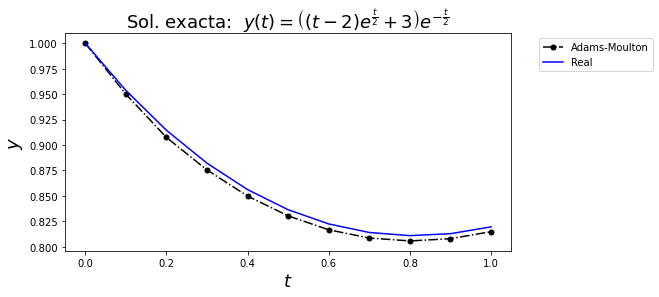

Error de Adams-Moulton: 0.00701225410787853.


In [31]:
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxAdamsMoulton, yyAdamsMoulton = adamsMoulton3(f, a, ya, b, nodos)

# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxAdamsMoulton, yyAdamsMoulton, 'k-.o', label='Adams-Moulton', markersize=5) # Solución obtenida con el método de Euler explícito
ax.plot(xx, yy, 'b', label='Real') # Solución real

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorAdamsMoulton = abs(yy - yyAdamsMoulton).max()
print('Error de Adams-Moulton: {}.'.format(errorAdamsMoulton))

Para Milne-Simpon, tomando $k = 2$ tenemos:
\begin{equation*}
\begin{cases}
C_{0} = 1 - \alpha_{0} \\
C_{1} = 2 - \beta_{0} - \beta_{1} - \beta_{2} \\
C_{2} = \frac{4}{2} - \beta_{1} - 2 \beta_{2} \\
C_{3} = \frac{8}{6} - \frac{1}{2}\beta_{1} - \frac{4}{2} \beta_{2}
\end{cases}
\Rightarrow
\begin{cases}
\beta_{0} = \frac{1}{3} \\
\beta_{1} = \frac{4}{3} \\
\beta_{2} = \frac{1}{3}
\end{cases}
\end{equation*}
Por lo que nos queda:
$$x_{n+2} = x_{n} + \frac{h}{3} (f_{n} + 4f_{n+1} + f_{n+2})$$

Para $k = 3$:
\begin{equation*}
\begin{cases}
C_{0} = 1 - \alpha_{1} \\
C_{1} = 3 - \alpha_{1} - \beta_{0} - \beta_{1} - \beta_{2} - \beta_{3} \\
C_{2} = \frac{9}{2} - \frac{1}{2} \alpha_{1} - \beta_{1} - 2 \beta_{2} - 3 \beta_{3} \\
C_{3} = \frac{27}{6} - \frac{1}{6} \alpha_{1} - \frac{1}{2} \beta_{1} - 2 \beta_{2} - \frac{9}{2}\beta_{3} \\
C_{4} = \frac{81}{24} - \frac{1}{24} \alpha_{1} - \frac{1}{6}\beta_{1} - \frac{8}{6}\beta_{2} - \frac{27}{6}\beta_{3}
\end{cases}
\Rightarrow
\begin{cases}
\beta_{0} = \frac{1}{21} \\
\beta_{1} = \frac{3}{14} \\
\beta_{2} = \frac{10}{7} \\
\beta_{3} = \frac{13}{42}
\end{cases}
\end{equation*}
Por lo que nos queda:
$$x_{n+3} = x_{n+1} + \frac{h}{42} (2 f_{n} + 9 f_{n+1} + 60 f_{n+2} + 13 f_{n+3})$$

In [32]:
def milneSimpson2(F, x0, y0, xfinal, N):
    X = np.linspace(x0, xfinal, N + 1)
    h = (xfinal - x0) / N
    y1 = y0 + h * F(x0, y0)
    y2 = sp.Symbol('y2')
    Y = [y0, y1]
    for n in range(N - 1):
        Y.append(sp.solve(Y[n] + h / 3 * (F(X[n], Y[n]) + 4 * F(X[n+1], Y[n+1]) + F(X[n+2], y2)) - y2, y2)[0])
    return np.array(X), np.array(Y)

def milneSimpson3(F, x0, y0, xfinal, N): 
    X = np.linspace(x0, xfinal, N + 1)
    h = (xfinal - x0) / N
    y1 = y0 + h * F(x0, y0)
    y2 = y1 + h * F(x0 + h, y1)
    y3 = sp.Symbol('y3')
    Y = [y0, y1, y2]
    for n in range(N - 2):
        Y.append(sp.solve(Y[n+1] + h / 42 * (2 * F(X[n], Y[n]) + 9 * F(X[n+1], Y[n+1]) + 60 * F(X[n+2], Y[n+2]) + 13 * F(X[n+3], y3)) - y3, y3)[0])
    return np.array(X),np.array(Y)

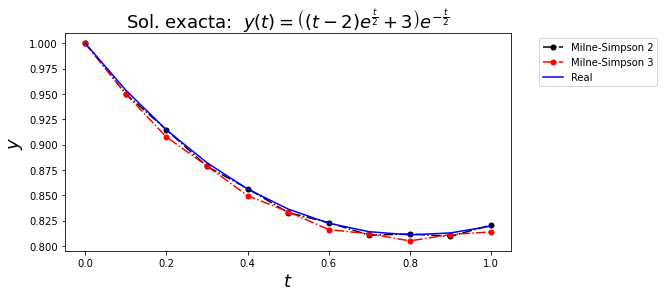

Error de Milne-Simpson (k=2): 0.00368827350214207.
Error de Milne-Simpson (k=3): 0.00701225410787853.


In [33]:
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxMilneSimpson2, yyMilneSimpson2 = milneSimpson2(f, a, ya, b, nodos)
xxMilneSimpson3, yyMilneSimpson3 = milneSimpson3(f, a, ya, b, nodos)

# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxMilneSimpson2, yyMilneSimpson2, 'k-.o', label='Milne-Simpson 2', markersize=5)
ax.plot(xxMilneSimpson3, yyMilneSimpson3, 'r-.o', label='Milne-Simpson 3', markersize=5)
ax.plot(xx, yy, 'b', label='Real')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorMilneSimpson2 = abs(yy - yyMilneSimpson2).max()
errorMilneSimpson3 = abs(yy - yyMilneSimpson3).max()
print('Error de Milne-Simpson (k=2): {}.\nError de Milne-Simpson (k=3): {}.'.format(errorMilneSimpson2, errorMilneSimpson3))

Para Nyström, tomando también $k = 2$ y $r = 1$ tenemos:
\begin{equation*}
\begin{cases}
C_{0} = 1 - \alpha_{0} \\
C_{1} = 2 - \beta_{0} - \beta_{1} \\
C_{2} = \frac{4}{2} - \beta_{1} \\
\end{cases}
\Rightarrow
\begin{cases}
\beta_{0} = 0 \\
\beta_{1} = 2
\end{cases}
\end{equation*}
Por lo que nos queda de la forma:
$$x_{n+3} = x_{n+1} + h \cdot 2 f_{n+1}$$

Y con $k=3$:
\begin{equation*}
\begin{cases}
C_{0} = 1 - \alpha_{1} \\
C_{1} = 3 - \alpha_{1} - \beta_{0} - \beta_{1} - \beta_{2} \\
C_{2} = \frac{9}{2} - \frac{1}{2} \alpha_{1} - \beta_{1} - 2 \beta_{2} \\
C_{3} = \frac{27}{6} - \frac{1}{6} \alpha_{1} - \frac{1}{2} \beta_{1} - 2 \beta_{2}
\end{cases}
\Rightarrow
\begin{cases}
\beta_{0} = \frac{1}{3} \\
\beta_{1} = -\frac{2}{3} \\
\beta_{2} = \frac{7}{3}
\end{cases}
\end{equation*}
Por lo que nos queda de la forma:
$$x_{n+3} = x_{n+1} + \frac{h}{3}(f_{n} - 2 f_{n+1} + 7 f_{n+2})$$

In [34]:
def nystrom2(F, x0, y0, xfinal, N):
    X = np.linspace(x0, xfinal, N + 1)
    h = (xfinal - x0) / N
    y1 = y0 + h * F(x0, y0)
    Y = [y0, y1]
    for n in range(N - 1):
        Y.append(Y[n] + h * 2 * (F(X[n+1], Y[n+1])))
    return np.array(X), np.array(Y)

def nystrom3(F, x0, y0, xfinal, N):
    X = np.linspace(x0, xfinal, N + 1)
    h = (xfinal - x0) / N
    y1 = y0 + h * F(x0, y0)
    y2 = y1 + h * F(x0 + h, y1)
    Y = [y0, y1, y2]
    for n in range(N - 2):
        Y.append(Y[n+1] + h / 3 * (F(X[n], Y[n]) - 2 * F(X[n+1], Y[n+1]) + 7 * F(X[n+2], Y[n+2])))
    return np.array(X), np.array(Y)

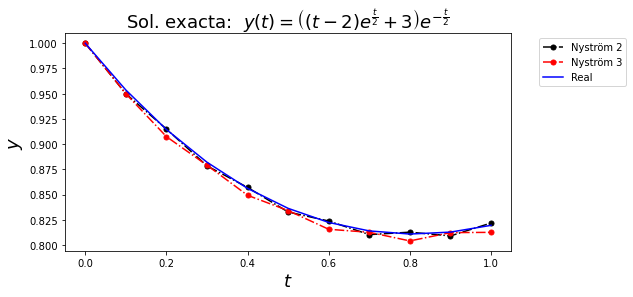

Error de Nyström (k=2): 0.00376977636532005 
Error de Nyström (k=3): 0.00701225410787853.


In [35]:
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxNystrom2, yyNystrom2 = nystrom2(f, a, ya, b, nodos)
xxNystrom3, yyNystrom3 = nystrom3(f, a, ya, b, nodos)

# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxNystrom2, yyNystrom2, 'k-.o', label='Nyström 2', markersize=5)
ax.plot(xxNystrom3, yyNystrom3, 'r-.o', label='Nyström 3', markersize=5)
ax.plot(xx, yy, 'b', label='Real')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorNystrom2 = abs(yy - yyNystrom2).max()
errorNystrom3 = abs(yy - yyNystrom3).max()
print('Error de Nyström (k=2): {} \nError de Nyström (k=3): {}.'.format(errorNystrom2, errorNystrom3))

Por último, para Newton-Cotes tomaremos $k = 3$ y $m = r = 1$:

\begin{equation*}
\begin{cases}
C_{1} = 3 - \beta_{0} - \beta_{1} - \beta_{2} \\
C_{2} = \frac{9}{2} - \beta_{1} - 2\beta_{2} \\
C_{3} = \frac{27}{6} - \frac{1}{2}\beta_{1} - 2\beta_{2}
\end{cases}
\Rightarrow
\begin{cases}
\beta_{0} = \frac{3}{4} \\
\beta_{1} = 0 \\
\beta_{2} = \frac{9}{4}
\end{cases}
\end{equation*}
Por lo que nos queda:
$$x_{n+3} = x_{n} + \frac{h}{4} (3f_{n} + 9f_{n+2})$$

In [36]:
def newtonCotes3(F, x0, y0, xfinal, N):
    X = np.linspace(x0, xfinal, N + 1)
    h = (xfinal - x0) / N
    y1 = y0 + h * F(x0, y0)
    y2 = y1 + h * F(x0 + h, y1)
    Y = [y0, y1, y2]
    for n in range(N - 2):
        Y.append(Y[n] + h / 4 * (3 * F(X[n], Y[n]) + 9 * F(X[n+2], Y[n+2])))
    return np.array(X), np.array(Y)

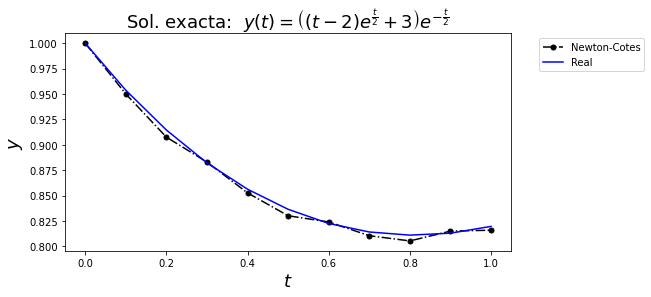

Error de Newton-Cotes: 0.00701225410787853.


In [37]:
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
xxNewtonCotes, yyNewtonCotes = newtonCotes3(f, a, ya, b, nodos)

# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.plot(xxNewtonCotes, yyNewtonCotes, 'k-.o', label='Newton-Cotes', markersize=5)
ax.plot(xx, yy, 'b', label='Real')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Errores
errorNewtonCotes = abs(yy - yyNewtonCotes).max()
print('Error de Newton-Cotes: {}.'.format(errorNewtonCotes))


# Métodos Predictor-Corrector

#### Ejercicio 1: Intente la implementación del algoritmo de tipo Predictor-Corrector anterior, o cualquier otro adecuado, eligiendo convenientemente los otros métodos necesarios para proporcionar los valores previos necesarios.

Implementaremos a continuación un método MML Predictor-Corrector con un AB de 5 pasos con un corrector AM de 4, y aplicando una sólo corrección en cada iteración:

P: $y_{n+5}^{(0)} = y_{n+4} + \frac{h}{720} (1901 f_{n+4} -2774 f_{n+3} +2616 f_{n+2} - 1274 f_{n+1} + 251 f_n)$

C$^1$: $y_{n+5} = y_{n+4} + \frac{h}{720} (251 f(t_{n+5},y_{n+5}^{(0)}) + 646 f_{n+4} -264 f_{n+3} +106 f_{n+2} - 19 f_{n+1})$ 

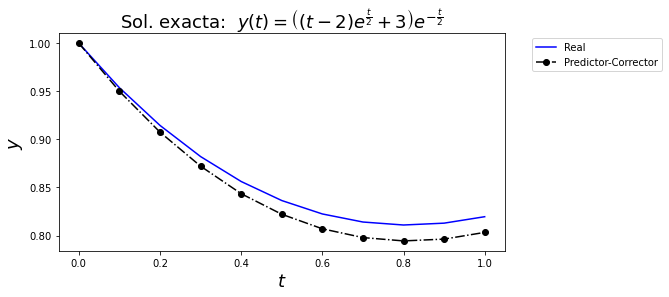

Error de Predictor-Corrector: 0.0165849812440760.


In [38]:
N = 10
x, Y = eulerExplicito(f, a, ya, b, N)
h = (b - a) / N
Y = Y[:5]
k = 5
for n in range(N - k + 1):
    yn5P = Y[n+4] + h/720 * (1901 * f(x[n+4], Y[n+4]) - 2774 * f(x[n+3], Y[n+3]) + 2616 * f(x[n+2], Y[n+2]) - 1274 * f(x[n+1], Y[n+1]) + 251 * f(x[n], Y[n]))
    yn5C = Y[n+4] + h/720 * (251 * f(x[n+5], yn5P) + 646 * f(x[n+4], Y[n+4]) - 264 * f(x[n+3], Y[n+3]) + 106 * f(x[n+2], Y[n+2]) + 19 * f(x[n+1], Y[n+1]))
    Y = np.insert(Y, len(Y), yn5C)
    
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])

# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.plot(xx, yy, 'b', label='Real') # Solución real
ax.plot(x, Y, 'k-.o', label='Predictor-Corrector')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Error
error = abs(yy - Y).max()
print('Error de Predictor-Corrector: {}.'.format(error))

Como ese ejemplo lo vimos en clase, vamos a usar otro distinto utilizando los modelos obtenidos en el ejercicio anterior. En mi caso, el predictor será Nyström de 3 pasos, y el corrector será Milne-Simpson de 2 pasos:

P: $y_{n+3}^{(0)} = y_{n+1} + \frac{h}{3} (7 f_{n+2} -2 f_{n+1} + f_n)$

C$^1$: $y_{n+3} = y_{n} + \frac{h}{3} (f(t_{n+3},y_{n+3}^{(0)}) + 4 f_{n+2} + f_{n+1})$ 

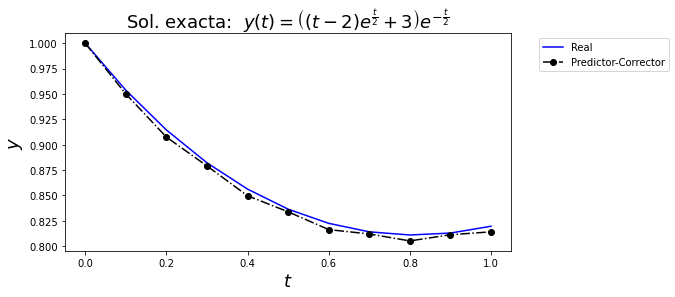

Error de Predictor-Corrector: 0.00701225410787853.


In [39]:
N = 10
x, Y = eulerExplicito(f, a, ya, b, N)
h = (b - a) / N
Y = Y[:3]
k = 3
for n in range(N - k + 1):
    yn3P = Y[n+1] + h/3 * (7 * f(x[n+2], Y[n+2]) - 2 * f(x[n+1], Y[n+1]) + f(x[n], Y[n]))
    yn3C = Y[n+1] + h/3 * (f(x[n+3], yn3P) + 4 * f(x[n+2], Y[n+2]) + f(x[n+1], Y[n+1]))
    Y = np.insert(Y, len(Y), yn3C)
    
xx = np.linspace(a, b, nodos + 1)
yy = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])

# Gráfica
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.plot(xx, yy, 'b', label='Real') # Solución real
ax.plot(x, Y, 'k-.o', label='Predictor-Corrector')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Error
error = abs(yy - Y).max()
print('Error de Predictor-Corrector: {}.'.format(error))